<a href="https://colab.research.google.com/github/cmoore102589/ai-data-science-portfolio/blob/main/Fundamentals%20of%20AI%20Portfolio%20Assignments/Lab_02_MMoore25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COSC-640: Lab 2

**Matthew Corley Moore**

[PLACEHOLDER_FOR_NOTEBOOK_LINK]


## Getting Started

Follow the instructions below to copy this notebook and to perform some initial setup.

1. Copy this notebook by selecting `File > Save a copy in Drive`.
2. A new window should open for the copied notebook. Move the new notebook to your course folder in Google Drive by selecting `File > Move` and then selecting the desired folder.
3. Update the name of the notebook by removing "Copy of" and replacing "Username" with your actual username.
4. Update the first cell in the notebook by specifying your course number (440 or 640) and by replacing "**Student Name**" with your actual name.
5. Do not edit the line that says `PLACEHOLDER_FOR_NOTEBOOK_LINK`. This will be used by the [Notebook Renderer](https://colab.research.google.com/drive/1CJTipys46ldZxJFwnt7XbdjQUfkmoXeU?usp=sharing) tool to insert a link to your Colab notebook.
6. Enable link sharing for your notebook.

## Preparing the Colab Environment

Run the cell below to download the `aitools` course package.

In [ ]:
%%capture
!rm aitools -r
!git clone https://github.com/drbeane/aitools.git

Run the cells below to import the necessary tools for this assignment. No other import statements are required for this lab, and no other import statements should be included in this assignment.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from aitools.algs.search import general_search, greedy_best_first, astar_search
from aitools.envs import RoutePlanning, NPuzzle, TSP

# Part 1: Route Planning Problem

In Part 1, you will compare the performance of the five search algorithms on the route planning environment. You will start by simply comparing the results of the two informed search algorithm on a single instance of the environment. After that, you will compare the average performance of all five algorithms when applied to multiple environments.

## 1.A - Apply Algorithms

Create an instance of the `RoutePlanning` environment with 500 sites and with `random_state=164`. Apply the **greedy best-first search** and **A*** search algorithms to the environment. Set a time limit of 2 minutes for each algorithm. Store the solutions and the resulting log information into variables. Leave display_results with its default value of True.

In [ ]:
route_planning_env = RoutePlanning(num_sites= 500, random_state= 164)

gbf_soln, gbf_log = greedy_best_first(route_planning_env, time_limit = 120, display_results= True)
ast_soln, ast_log = astar_search(route_planning_env, time_limit = 120, display_results = True)



[GBF] Solution found.
440 nodes seen.
243 nodes skipped
95 nodes expanded.
102 nodes remaining in frontier.
0.02 seconds elapsed.
Path Length: 44, Path Cost: 237.64

[AST] Solution found.
533 nodes seen.
281 nodes skipped
109 nodes expanded.
143 nodes remaining in frontier.
0.02 seconds elapsed.
Path Length: 23, Path Cost: 115.77



## 1.B - Plot Solutions
Use Matplotlib to create a 1x2 grid of subplots. Each subplot should display the solution generated by one of the two search algorithms. Add a title to each subplot to indicate which algorithm the solution corresponds to. You can use the abbreviations **GBF** and **AST**. In order to include the plot generated by the `display()` method of your state variable in a subplot, you will need to set `show_plot=False` when calling the method.

Hint: You can use code similar to what was provided for Part 1.C in Lab 01.

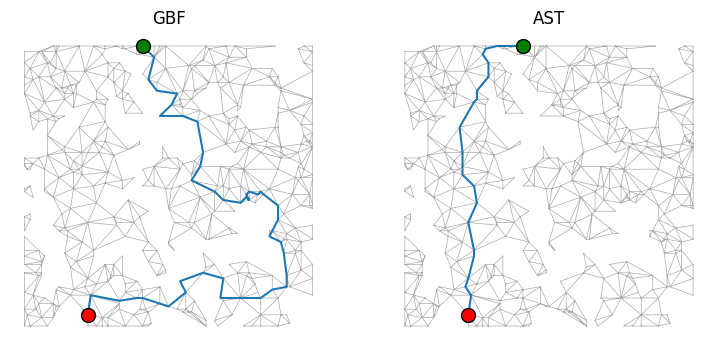

In [ ]:
solns = [gbf_soln, ast_soln]
algs = ['GBF', 'AST']

plt.figure(figsize=[9,4])
for i, pair in enumerate(zip(solns,algs)):
    soln, alg = pair
    plt.subplot(1,2,i+1)
    soln.display(show_plot = False)
    plt.title(alg)
plt.show()

## 1.C - Multiple Environments

You will now apply each of the five search algorithms to 100 different instances of the `RoutePlanning` environment, recording the costs and search times for the algorithm in lists. You will need to create 10 lists for this task. There will be two lists for each algorithm (1 for path costs and 1 for search times).

To create the environments, use a `for` loop, looping over the range `range(100)`. With each iteration of the loop, create an instance of `RoutePlanning` with `num_sites=500` and `random_state=i` (where `i` is the loop counter).

With each iteration of the loop, you should apply all 5 search algorithms to the current instance of the environment, storing the path cost and the search time for the solutions in the appropriate lists. When applying the search algorithms, **you should disable the result display feature** by setting `display_results=False`.

You do not need to print anything in this cell.

**Hint:** You can accomplish this task by adapting the code used for Part 2.A of Lab 1. However, if you would prefer to write your own code from scratch, that is fine as well.


In [ ]:
algorithms = ['DFS', 'BFS', 'UCS', 'GBF', 'AST']
lengths = {alg:[] for alg in algorithms}
costs   = {alg:[] for alg in algorithms}
times   = {alg:[] for alg in algorithms}

for i in tqdm(range(100)):
    state = RoutePlanning(num_sites=500, random_state=i)
    for alg in algorithms:
        soln, log = general_search(root=state, alg=alg, display_results=False)


        p = soln.path          # p should be set to the path for the solution found.
        c = soln.path_cost()     # c should be set to the path cost for the solution.
        t = log.get('time')    # t should be the runtime for the algorithm

        lengths[alg].append(len(p))
        costs[alg].append(c)
        times[alg].append(t)

100%|██████████| 100/100 [00:13<00:00,  7.56it/s]


## 1.D - Average Performance

Use the lists created in Part 1.D to create two new lists named `mean_costs` and `mean_times`. Each of these lists should contain 5 values, which will be the averages lists from 1.D. For example, `mean_costs` should contain the averages of 5 cost lists.

Print these `mean_costs` with the values **rounded to 2 decimal places**. Print the `mean_times` list with the values **rounded to 4 decimal places**. You can use `np.round()` to perform the rounding.

**Hint:** You can accomplish this task by adapting the code provide in Part 2.B of Lab 1.

In [ ]:
mean_costs = [np.mean(costs[a]) for a in algorithms]
mean_times = [np.mean(times[a]) for a in algorithms]

mean_costs = (np.round(mean_costs, 2))
mean_times = (np.round(mean_times, 4))

print(f"Mean Costs: {mean_costs}")
print(f"Mean Times: {mean_times}")

Mean Costs: [419.69  80.01  71.91  85.69  71.91]
Mean Times: [0.0258 0.0202 0.0266 0.005  0.0121]


## 1.E - Plotting Mean Performance

Run the cell below to generate a figure containing two bar charts. One bar chart will demonstrate the average path cost for the 5 algorithms, while the other will demonstrate the average search time.

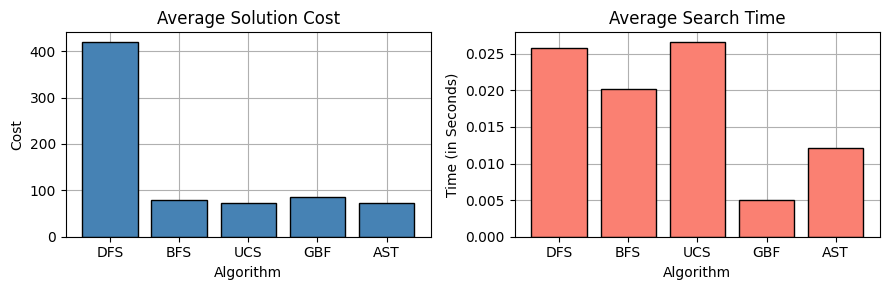

In [ ]:
plt.figure(figsize=[9,3])
plt.subplot(1,2,1)
plt.bar(algorithms, mean_costs, color='steelblue', edgecolor='k', zorder=2)
plt.grid(); plt.title('Average Solution Cost'); plt.xlabel('Algorithm'), plt.ylabel('Cost')
plt.subplot(1,2,2)
plt.bar(algorithms, mean_times, color='salmon', edgecolor='k', zorder=2)
plt.grid(); plt.title('Average Search Time'); plt.xlabel('Algorithm'), plt.ylabel('Time (in Seconds)')
plt.tight_layout()
plt.show()

## 1.F - Ratios of Path Costs

In Part 1.A, you should have seen that the path cost for the solution found by GBF was over twice as large as the path cost for the solution found by AST, suggsting that GBF has poor performance on the Route Planning problem. However, the results from Part 1.E should show that, on average, the path costs for solutions found by GBF are only slightly larger than those for AST.

In truth, the seed value of 164 specified in 1.A was selected specifically to generate an instance of Route Planning for which GBF has unusually poor performance.

To get a better sense as to how the path costs for GBF and AST compare, we will calculate ratios of path costs by dividing the path costs for GBF found in 1.D by the path costs for AST.

Create a list or array named `cost_ratios`. This list/array should have 100 elements, and each one should be obtained by dividing a path cost for GBF by a path cost for AST (for the same environment instance).

This can be accomplished in a single line using either of the techniques mentioned below:
1. Convert each path cost list into an array using `np.array()` and divide one array by another.
2. Using list comprehensions and the `zip()` function.

After defining `cost_ratio`, run the cell below to display a histogram of the results.

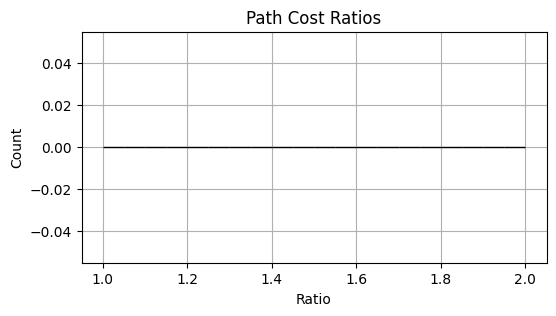

In [ ]:
cost_ratios = []

for i in range(100):
  gbf_path_costs = gbf_soln.path_cost()
  ast_path_costs = ast_soln.path_cost()

  cost_ratio = np.array(gbf_path_costs)/np.array(ast_path_costs)

cost_ratios.append(cost_ratio)

plt.figure(figsize=[6,3])
plt.hist(cost_ratios, bins=np.linspace(1,2,21), color='orchid', edgecolor='k', zorder=2)
plt.title('Path Cost Ratios')
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.grid()
plt.show()

# Part 2: Traveling Salesperson Problem

In Part 2, you will explore the performance the greedy best-first and A* search algorithms on the Traveling Salesperson problem.

## 2.A - Apply Algorithms

Create an instance of the TSP environment with 12 sites and with `random_state=7`. Apply the **greedy best-first search** and **A*** search algorithms to the environment. Set a time limit of 2 minutes for each algorithm. Store the solutions and the resulting log information into variables. Leave display_results with its default value of True.

In [ ]:
tsp_env = TSP(num_sites = 12, random_state = 7)

gbf_tsp_soln, gbf_tsp_log = greedy_best_first(tsp_env, time_limit = 120, display_results= True)
ast_tsp_soln, ast_tsp_log = astar_search(tsp_env, time_limit = 120, display_results = True)

[GBF] Solution found.
67 nodes seen.
0 nodes skipped
12 nodes expanded.
55 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 399.5

[AST] Solution found.
10696 nodes seen.
0 nodes skipped
1713 nodes expanded.
8983 nodes remaining in frontier.
0.58 seconds elapsed.
Solution Cost: 322.9



## 2.B - Plot Solutions

Use Matplotlib to create a 1x2 grid of subplots. Each subplot should display the solution generated by one of the two search algorithms. Add a title to each subplot to indicate which algorithm the solution corresponds to. You can use the abbreviations GBF and AST. In order to include the plot generated by the `display()` method of your state variable in a subplot, you will need to set `show_plot=False` when calling the method.

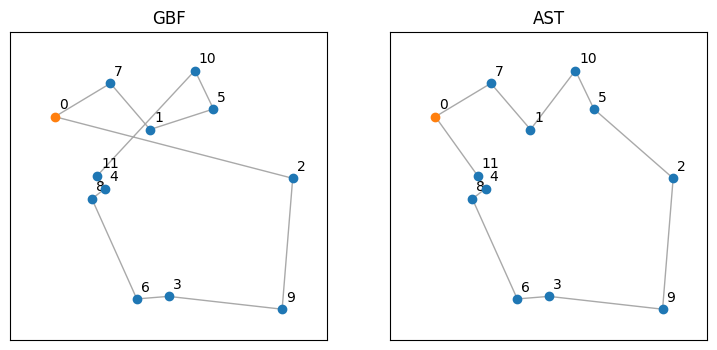

In [ ]:
solns = [gbf_tsp_soln, ast_tsp_soln]
algs = ['GBF', 'AST']

plt.figure(figsize=[9,4])
for i, pair in enumerate(zip(solns,algs)):
    soln, alg = pair
    plt.subplot(1,2,i+1)
    soln.display(show_plot = False)
    plt.title(alg)
plt.show()

## 2.C - Search Time Comparison

The results from 2.A indicate that the greedy best-first algorithm has a significantly faster runtime than the A* algorithm on the TSP problem. We will explore this further by analysing how the search time for the two algorithsm varies based on the number of sites in the TSP problem.

An outline of the process we will use is as follows:
* For each algorithm, you will apply the algorithm to TSP environments with a varying number of sites. The number of sites to be used are provided in the cell below in lists named `gbf_sites` and `ast_sites`.
* For each number of sites, you will use a loop to create 20 different TSP environments with that number of sites and you will apply the appropriate search algorithm to each of the 20 environments.
* For each number of sites, you will calculate the average search time by summing the individual search times and dividing by 20.

Starter code for this task is provided in the cell below. You need to complete the code for the two inner loops. Within each loop, you need to perform the following steps:
1. Create an instance of `TSP` with `n` sites. Do not set a `random_state` value.
2. Apply the appropriate algorithm to the TSP instance you have created.
3. Increment the `total_time` variable by the search time for the algorithm.


In [ ]:
%%time
gbf_sites = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
ast_sites = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
gbf_times = []
ast_times = []

np.random.seed(1)
for n in tqdm(gbf_sites):
    total_time = 0
    for i in range(20):
        tsp_2c = TSP(num_sites = n)
        greedy_best_first(tsp_2c)
        total_time += log['time'] in gbf_times

    gbf_times.append(total_time / 20)

for n in tqdm(ast_sites):
    total_time = 0
    for i in range(20):
        tsp_2c = TSP(num_sites = n)
        astar_search(tsp_2c)
        total_time += log['time'] in ast_times

    ast_times.append(total_time / 20)


  9%|▉         | 1/11 [00:00<00:01,  7.24it/s]

[GBF] Solution found.
191 nodes seen.
0 nodes skipped
20 nodes expanded.
171 nodes remaining in frontier.
0.01 seconds elapsed.
Solution Cost: 417.6

[GBF] Solution found.
191 nodes seen.
0 nodes skipped
20 nodes expanded.
171 nodes remaining in frontier.
0.01 seconds elapsed.
Solution Cost: 368.6

[GBF] Solution found.
191 nodes seen.
0 nodes skipped
20 nodes expanded.
171 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 454.2

[GBF] Solution found.
191 nodes seen.
0 nodes skipped
20 nodes expanded.
171 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 387.0

[GBF] Solution found.
191 nodes seen.
0 nodes skipped
20 nodes expanded.
171 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 382.3

[GBF] Solution found.
191 nodes seen.
0 nodes skipped
20 nodes expanded.
171 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 433.1

[GBF] Solution found.
191 nodes seen.
0 nodes skipped
20 nodes expanded.
171 nodes remaining in frontier

 18%|█▊        | 2/11 [00:00<00:02,  4.00it/s]

[GBF] Solution found.
436 nodes seen.
0 nodes skipped
30 nodes expanded.
406 nodes remaining in frontier.
0.01 seconds elapsed.
Solution Cost: 484.9

[GBF] Solution found.
436 nodes seen.
0 nodes skipped
30 nodes expanded.
406 nodes remaining in frontier.
0.01 seconds elapsed.
Solution Cost: 619.1

[GBF] Solution found.
436 nodes seen.
0 nodes skipped
30 nodes expanded.
406 nodes remaining in frontier.
0.01 seconds elapsed.
Solution Cost: 596.6

[GBF] Solution found.
781 nodes seen.
0 nodes skipped
40 nodes expanded.
741 nodes remaining in frontier.
0.02 seconds elapsed.
Solution Cost: 625.6

[GBF] Solution found.
781 nodes seen.
0 nodes skipped
40 nodes expanded.
741 nodes remaining in frontier.
0.02 seconds elapsed.
Solution Cost: 695.4

[GBF] Solution found.
781 nodes seen.
0 nodes skipped
40 nodes expanded.
741 nodes remaining in frontier.
0.02 seconds elapsed.
Solution Cost: 592.4

[GBF] Solution found.
781 nodes seen.
0 nodes skipped
40 nodes expanded.
741 nodes remaining in fron

 27%|██▋       | 3/11 [00:00<00:02,  2.77it/s]

[GBF] Solution found.
781 nodes seen.
0 nodes skipped
40 nodes expanded.
741 nodes remaining in frontier.
0.02 seconds elapsed.
Solution Cost: 538.0

[GBF] Solution found.
781 nodes seen.
0 nodes skipped
40 nodes expanded.
741 nodes remaining in frontier.
0.02 seconds elapsed.
Solution Cost: 566.2

[GBF] Solution found.
781 nodes seen.
0 nodes skipped
40 nodes expanded.
741 nodes remaining in frontier.
0.02 seconds elapsed.
Solution Cost: 580.4

[GBF] Solution found.
781 nodes seen.
0 nodes skipped
40 nodes expanded.
741 nodes remaining in frontier.
0.02 seconds elapsed.
Solution Cost: 628.5

[GBF] Solution found.
781 nodes seen.
0 nodes skipped
40 nodes expanded.
741 nodes remaining in frontier.
0.02 seconds elapsed.
Solution Cost: 671.9

[GBF] Solution found.
1226 nodes seen.
0 nodes skipped
50 nodes expanded.
1176 nodes remaining in frontier.
0.04 seconds elapsed.
Solution Cost: 677.4

[GBF] Solution found.
1226 nodes seen.
0 nodes skipped
50 nodes expanded.
1176 nodes remaining in 

 36%|███▋      | 4/11 [00:01<00:03,  1.86it/s]

[GBF] Solution found.
1226 nodes seen.
0 nodes skipped
50 nodes expanded.
1176 nodes remaining in frontier.
0.04 seconds elapsed.
Solution Cost: 720.8

[GBF] Solution found.
1226 nodes seen.
0 nodes skipped
50 nodes expanded.
1176 nodes remaining in frontier.
0.03 seconds elapsed.
Solution Cost: 703.0

[GBF] Solution found.
1771 nodes seen.
0 nodes skipped
60 nodes expanded.
1711 nodes remaining in frontier.
0.05 seconds elapsed.
Solution Cost: 762.0

[GBF] Solution found.
1771 nodes seen.
0 nodes skipped
60 nodes expanded.
1711 nodes remaining in frontier.
0.05 seconds elapsed.
Solution Cost: 825.3

[GBF] Solution found.
1771 nodes seen.
0 nodes skipped
60 nodes expanded.
1711 nodes remaining in frontier.
0.05 seconds elapsed.
Solution Cost: 740.5

[GBF] Solution found.
1771 nodes seen.
0 nodes skipped
60 nodes expanded.
1711 nodes remaining in frontier.
0.06 seconds elapsed.
Solution Cost: 725.8

[GBF] Solution found.
1771 nodes seen.
0 nodes skipped
60 nodes expanded.
1711 nodes rem

 45%|████▌     | 5/11 [00:02<00:04,  1.27it/s]

[GBF] Solution found.
1771 nodes seen.
0 nodes skipped
60 nodes expanded.
1711 nodes remaining in frontier.
0.05 seconds elapsed.
Solution Cost: 724.5

[GBF] Solution found.
1771 nodes seen.
0 nodes skipped
60 nodes expanded.
1711 nodes remaining in frontier.
0.06 seconds elapsed.
Solution Cost: 769.2

[GBF] Solution found.
1771 nodes seen.
0 nodes skipped
60 nodes expanded.
1711 nodes remaining in frontier.
0.07 seconds elapsed.
Solution Cost: 775.5

[GBF] Solution found.
2416 nodes seen.
0 nodes skipped
70 nodes expanded.
2346 nodes remaining in frontier.
0.09 seconds elapsed.
Solution Cost: 821.5

[GBF] Solution found.
2416 nodes seen.
0 nodes skipped
70 nodes expanded.
2346 nodes remaining in frontier.
0.12 seconds elapsed.
Solution Cost: 892.6

[GBF] Solution found.
2416 nodes seen.
0 nodes skipped
70 nodes expanded.
2346 nodes remaining in frontier.
0.08 seconds elapsed.
Solution Cost: 788.7

[GBF] Solution found.
2416 nodes seen.
0 nodes skipped
70 nodes expanded.
2346 nodes rem

 55%|█████▍    | 6/11 [00:04<00:05,  1.14s/it]

[GBF] Solution found.
2416 nodes seen.
0 nodes skipped
70 nodes expanded.
2346 nodes remaining in frontier.
0.08 seconds elapsed.
Solution Cost: 840.0

[GBF] Solution found.
2416 nodes seen.
0 nodes skipped
70 nodes expanded.
2346 nodes remaining in frontier.
0.07 seconds elapsed.
Solution Cost: 799.1

[GBF] Solution found.
2416 nodes seen.
0 nodes skipped
70 nodes expanded.
2346 nodes remaining in frontier.
0.08 seconds elapsed.
Solution Cost: 974.8

[GBF] Solution found.
3161 nodes seen.
0 nodes skipped
80 nodes expanded.
3081 nodes remaining in frontier.
0.18 seconds elapsed.
Solution Cost: 924.8

[GBF] Solution found.
3161 nodes seen.
0 nodes skipped
80 nodes expanded.
3081 nodes remaining in frontier.
0.11 seconds elapsed.
Solution Cost: 832.9

[GBF] Solution found.
3161 nodes seen.
0 nodes skipped
80 nodes expanded.
3081 nodes remaining in frontier.
0.11 seconds elapsed.
Solution Cost: 732.7

[GBF] Solution found.
3161 nodes seen.
0 nodes skipped
80 nodes expanded.
3081 nodes rem

 64%|██████▎   | 7/11 [00:07<00:06,  1.56s/it]

[GBF] Solution found.
3161 nodes seen.
0 nodes skipped
80 nodes expanded.
3081 nodes remaining in frontier.
0.11 seconds elapsed.
Solution Cost: 827.8

[GBF] Solution found.
3161 nodes seen.
0 nodes skipped
80 nodes expanded.
3081 nodes remaining in frontier.
0.11 seconds elapsed.
Solution Cost: 814.7

[GBF] Solution found.
4006 nodes seen.
0 nodes skipped
90 nodes expanded.
3916 nodes remaining in frontier.
0.22 seconds elapsed.
Solution Cost: 1044.1

[GBF] Solution found.
4006 nodes seen.
0 nodes skipped
90 nodes expanded.
3916 nodes remaining in frontier.
0.15 seconds elapsed.
Solution Cost: 809.4

[GBF] Solution found.
4006 nodes seen.
0 nodes skipped
90 nodes expanded.
3916 nodes remaining in frontier.
0.14 seconds elapsed.
Solution Cost: 881.5

[GBF] Solution found.
4006 nodes seen.
0 nodes skipped
90 nodes expanded.
3916 nodes remaining in frontier.
0.14 seconds elapsed.
Solution Cost: 917.5

[GBF] Solution found.
4006 nodes seen.
0 nodes skipped
90 nodes expanded.
3916 nodes re

 73%|███████▎  | 8/11 [00:10<00:06,  2.21s/it]

[GBF] Solution found.
4006 nodes seen.
0 nodes skipped
90 nodes expanded.
3916 nodes remaining in frontier.
0.26 seconds elapsed.
Solution Cost: 873.0

[GBF] Solution found.
4951 nodes seen.
0 nodes skipped
100 nodes expanded.
4851 nodes remaining in frontier.
0.25 seconds elapsed.
Solution Cost: 972.1

[GBF] Solution found.
4951 nodes seen.
0 nodes skipped
100 nodes expanded.
4851 nodes remaining in frontier.
0.26 seconds elapsed.
Solution Cost: 978.5

[GBF] Solution found.
4951 nodes seen.
0 nodes skipped
100 nodes expanded.
4851 nodes remaining in frontier.
0.19 seconds elapsed.
Solution Cost: 967.0

[GBF] Solution found.
4951 nodes seen.
0 nodes skipped
100 nodes expanded.
4851 nodes remaining in frontier.
0.18 seconds elapsed.
Solution Cost: 1003.0

[GBF] Solution found.
4951 nodes seen.
0 nodes skipped
100 nodes expanded.
4851 nodes remaining in frontier.
0.19 seconds elapsed.
Solution Cost: 1016.5

[GBF] Solution found.
4951 nodes seen.
0 nodes skipped
100 nodes expanded.
4851 n

 82%|████████▏ | 9/11 [00:15<00:05,  2.99s/it]

[GBF] Solution found.
4951 nodes seen.
0 nodes skipped
100 nodes expanded.
4851 nodes remaining in frontier.
0.25 seconds elapsed.
Solution Cost: 1002.6

[GBF] Solution found.
5996 nodes seen.
0 nodes skipped
110 nodes expanded.
5886 nodes remaining in frontier.
0.24 seconds elapsed.
Solution Cost: 957.4

[GBF] Solution found.
5996 nodes seen.
0 nodes skipped
110 nodes expanded.
5886 nodes remaining in frontier.
0.28 seconds elapsed.
Solution Cost: 1065.6

[GBF] Solution found.
5996 nodes seen.
0 nodes skipped
110 nodes expanded.
5886 nodes remaining in frontier.
0.26 seconds elapsed.
Solution Cost: 1024.9

[GBF] Solution found.
5996 nodes seen.
0 nodes skipped
110 nodes expanded.
5886 nodes remaining in frontier.
0.24 seconds elapsed.
Solution Cost: 1093.0

[GBF] Solution found.
5996 nodes seen.
0 nodes skipped
110 nodes expanded.
5886 nodes remaining in frontier.
0.23 seconds elapsed.
Solution Cost: 1112.7

[GBF] Solution found.
5996 nodes seen.
0 nodes skipped
110 nodes expanded.
58

 91%|█████████ | 10/11 [00:20<00:03,  3.73s/it]

[GBF] Solution found.
5996 nodes seen.
0 nodes skipped
110 nodes expanded.
5886 nodes remaining in frontier.
0.24 seconds elapsed.
Solution Cost: 1005.5

[GBF] Solution found.
7141 nodes seen.
0 nodes skipped
120 nodes expanded.
7021 nodes remaining in frontier.
0.5 seconds elapsed.
Solution Cost: 1060.4

[GBF] Solution found.
7141 nodes seen.
0 nodes skipped
120 nodes expanded.
7021 nodes remaining in frontier.
0.54 seconds elapsed.
Solution Cost: 1089.9

[GBF] Solution found.
7141 nodes seen.
0 nodes skipped
120 nodes expanded.
7021 nodes remaining in frontier.
0.3 seconds elapsed.
Solution Cost: 1001.1

[GBF] Solution found.
7141 nodes seen.
0 nodes skipped
120 nodes expanded.
7021 nodes remaining in frontier.
0.31 seconds elapsed.
Solution Cost: 1046.4

[GBF] Solution found.
7141 nodes seen.
0 nodes skipped
120 nodes expanded.
7021 nodes remaining in frontier.
0.35 seconds elapsed.
Solution Cost: 1079.8

[GBF] Solution found.
7141 nodes seen.
0 nodes skipped
120 nodes expanded.
702

100%|██████████| 11/11 [00:28<00:00,  2.55s/it]


[GBF] Solution found.
7141 nodes seen.
0 nodes skipped
120 nodes expanded.
7021 nodes remaining in frontier.
0.32 seconds elapsed.
Solution Cost: 1096.9



 27%|██▋       | 3/11 [00:00<00:00, 19.63it/s]

[AST] Solution found.
2 nodes seen.
0 nodes skipped
2 nodes expanded.
0 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 116.4

[AST] Solution found.
2 nodes seen.
0 nodes skipped
2 nodes expanded.
0 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 158.8

[AST] Solution found.
2 nodes seen.
0 nodes skipped
2 nodes expanded.
0 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 90.6

[AST] Solution found.
2 nodes seen.
0 nodes skipped
2 nodes expanded.
0 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 64.8

[AST] Solution found.
2 nodes seen.
0 nodes skipped
2 nodes expanded.
0 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 50.4

[AST] Solution found.
2 nodes seen.
0 nodes skipped
2 nodes expanded.
0 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 108.4

[AST] Solution found.
2 nodes seen.
0 nodes skipped
2 nodes expanded.
0 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 10

 45%|████▌     | 5/11 [00:00<00:00, 13.24it/s]


[AST] Solution found.
30 nodes seen.
0 nodes skipped
13 nodes expanded.
17 nodes remaining in frontier.
0.01 seconds elapsed.
Solution Cost: 130.2

[AST] Solution found.
25 nodes seen.
0 nodes skipped
11 nodes expanded.
14 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 202.1

[AST] Solution found.
17 nodes seen.
0 nodes skipped
7 nodes expanded.
10 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 207.2

[AST] Solution found.
24 nodes seen.
0 nodes skipped
10 nodes expanded.
14 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 232.5

[AST] Solution found.
19 nodes seen.
0 nodes skipped
8 nodes expanded.
11 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 86.5

[AST] Solution found.
30 nodes seen.
0 nodes skipped
13 nodes expanded.
17 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 171.8

[AST] Solution found.
52 nodes seen.
0 nodes skipped
18 nodes expanded.
34 nodes remaining in frontier.
0.0 seconds ela

 64%|██████▎   | 7/11 [00:01<00:00,  5.22it/s]

[AST] Solution found.
740 nodes seen.
0 nodes skipped
206 nodes expanded.
534 nodes remaining in frontier.
0.03 seconds elapsed.
Solution Cost: 245.6

[AST] Solution found.
1049 nodes seen.
0 nodes skipped
250 nodes expanded.
799 nodes remaining in frontier.
0.04 seconds elapsed.
Solution Cost: 284.8

[AST] Solution found.
629 nodes seen.
0 nodes skipped
135 nodes expanded.
494 nodes remaining in frontier.
0.02 seconds elapsed.
Solution Cost: 319.1

[AST] Solution found.
713 nodes seen.
0 nodes skipped
163 nodes expanded.
550 nodes remaining in frontier.
0.02 seconds elapsed.
Solution Cost: 211.8

[AST] Solution found.
403 nodes seen.
0 nodes skipped
86 nodes expanded.
317 nodes remaining in frontier.
0.01 seconds elapsed.
Solution Cost: 264.5

[AST] Solution found.
1680 nodes seen.
0 nodes skipped
474 nodes expanded.
1206 nodes remaining in frontier.
0.06 seconds elapsed.
Solution Cost: 227.5

[AST] Solution found.
2365 nodes seen.
0 nodes skipped
609 nodes expanded.
1756 nodes remain

 73%|███████▎  | 8/11 [00:01<00:01,  2.94it/s]

[AST] Solution found.
1563 nodes seen.
0 nodes skipped
400 nodes expanded.
1163 nodes remaining in frontier.
0.06 seconds elapsed.
Solution Cost: 252.4

[AST] Solution found.
1719 nodes seen.
0 nodes skipped
470 nodes expanded.
1249 nodes remaining in frontier.
0.05 seconds elapsed.
Solution Cost: 221.3

[AST] Solution found.
1109 nodes seen.
0 nodes skipped
248 nodes expanded.
861 nodes remaining in frontier.
0.04 seconds elapsed.
Solution Cost: 313.8

[AST] Solution found.
7580 nodes seen.
0 nodes skipped
1760 nodes expanded.
5820 nodes remaining in frontier.
0.27 seconds elapsed.
Solution Cost: 219.4

[AST] Solution found.
1428 nodes seen.
0 nodes skipped
278 nodes expanded.
1150 nodes remaining in frontier.
0.05 seconds elapsed.
Solution Cost: 310.7

[AST] Solution found.
3549 nodes seen.
0 nodes skipped
713 nodes expanded.
2836 nodes remaining in frontier.
0.11 seconds elapsed.
Solution Cost: 321.2

[AST] Solution found.
2467 nodes seen.
0 nodes skipped
544 nodes expanded.
1923 no

 82%|████████▏ | 9/11 [00:04<00:01,  1.19it/s]

[AST] Solution found.
1153 nodes seen.
0 nodes skipped
222 nodes expanded.
931 nodes remaining in frontier.
0.05 seconds elapsed.
Solution Cost: 318.1

[AST] Solution found.
1037 nodes seen.
0 nodes skipped
172 nodes expanded.
865 nodes remaining in frontier.
0.04 seconds elapsed.
Solution Cost: 258.9

[AST] Solution found.
8009 nodes seen.
0 nodes skipped
1501 nodes expanded.
6508 nodes remaining in frontier.
0.5 seconds elapsed.
Solution Cost: 305.1

[AST] Solution found.
2588 nodes seen.
0 nodes skipped
458 nodes expanded.
2130 nodes remaining in frontier.
0.07 seconds elapsed.
Solution Cost: 325.8

[AST] Solution found.
4061 nodes seen.
0 nodes skipped
713 nodes expanded.
3348 nodes remaining in frontier.
0.14 seconds elapsed.
Solution Cost: 295.6

[AST] Solution found.
5317 nodes seen.
0 nodes skipped
1075 nodes expanded.
4242 nodes remaining in frontier.
0.16 seconds elapsed.
Solution Cost: 340.8

[AST] Solution found.
2096 nodes seen.
0 nodes skipped
378 nodes expanded.
1718 nod

 91%|█████████ | 10/11 [00:12<00:02,  2.72s/it]

[AST] Solution found.
7694 nodes seen.
0 nodes skipped
1395 nodes expanded.
6299 nodes remaining in frontier.
0.23 seconds elapsed.
Solution Cost: 291.8

[AST] Solution found.
2473 nodes seen.
0 nodes skipped
392 nodes expanded.
2081 nodes remaining in frontier.
0.08 seconds elapsed.
Solution Cost: 299.5

[AST] Solution found.
21040 nodes seen.
0 nodes skipped
3745 nodes expanded.
17295 nodes remaining in frontier.
0.7 seconds elapsed.
Solution Cost: 311.8

[AST] Solution found.
23031 nodes seen.
0 nodes skipped
4003 nodes expanded.
19028 nodes remaining in frontier.
0.86 seconds elapsed.
Solution Cost: 283.9

[AST] Solution found.
15626 nodes seen.
0 nodes skipped
2559 nodes expanded.
13067 nodes remaining in frontier.
0.49 seconds elapsed.
Solution Cost: 300.9

[AST] Solution found.
19938 nodes seen.
0 nodes skipped
3678 nodes expanded.
16260 nodes remaining in frontier.
0.96 seconds elapsed.
Solution Cost: 277.8

[AST] Solution found.
5418 nodes seen.
0 nodes skipped
819 nodes expan

100%|██████████| 11/11 [00:28<00:00,  2.58s/it]

[AST] Solution found.
11310 nodes seen.
0 nodes skipped
1858 nodes expanded.
9452 nodes remaining in frontier.
0.39 seconds elapsed.
Solution Cost: 254.8

CPU times: user 55.7 s, sys: 647 ms, total: 56.3 s
Wall time: 56.4 s


## 2.D - Plotting the Results

We will now visualize the results from the 2.D. Run the cell below to create two line plots showing how the average search time varied based on the number of sites. You should see that GBF perform much faster than A* when applied to an environment with many sites.

<ipython-input-12-5b77633f8458>:8: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim([0,M])
<ipython-input-12-5b77633f8458>:15: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim([0,M])


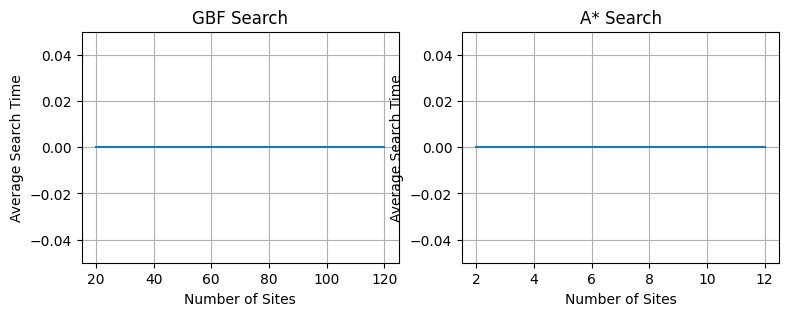

In [ ]:
M = 1.05 * np.max([gbf_times + ast_times])
plt.figure(figsize=[9,3])
plt.subplot(1,2,1)
plt.plot(gbf_sites, gbf_times)
plt.title('GBF Search')
plt.xlabel('Number of Sites')
plt.ylabel('Average Search Time')
plt.ylim([0,M])
plt.grid()
plt.subplot(1,2,2)
plt.plot(ast_sites, ast_times)
plt.title('A* Search')
plt.xlabel('Number of Sites')
plt.ylabel('Average Search Time')
plt.ylim([0,M])
plt.grid()
plt.show()

## 2.E - Applying GBF to a Large Problem

The figure above should show a rapid exponential growth in the search time for A* as the number of sites increases. Extrapolating this trend forward should indicate that it would be completely infeasible to apply A* Search to a TSP problem with more than 20-24 sites (at least when working in a Google Colab environment). However, the figure above should also show that we GBF can quickly solve TSP environments with over 100 sites. To test this, we will now apply the GBF algorithm to an environment with 200 sites.

Create an instance of the TSP environment with 200 sites and with `random_state=1`. Apply the **greedy best-first search** algorithm to the environment. Set a time limit of 2 minutes. Store the solutions and the resulting log information into variables. Leave `display_results` with its default value of `True`. Display the solution using the `display()` method, setting `labels=False` to reduce the clutter in the plot.

[GBF] Solution found.
19901 nodes seen.
0 nodes skipped
200 nodes expanded.
19701 nodes remaining in frontier.
1.57 seconds elapsed.
Solution Cost: 1242.1



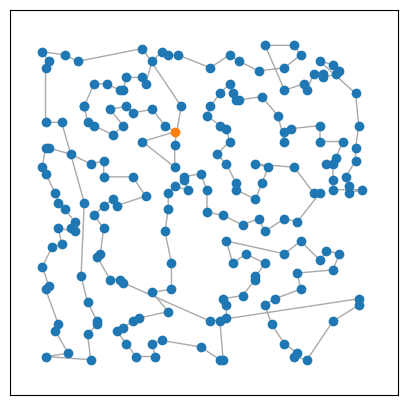

In [ ]:
tsp_env_2e = TSP(num_sites = 200, random_state = 1)

gbf_2e_soln, gbf_2e_log = greedy_best_first(tsp_env_2e, time_limit = 12)

gbf_2e_soln.display(labels = False)

## 2.F - Ratios of Path Costs

We have observed that GBF runs much faster than A* on the Traveling Salesperson problem, and also that GBF does not produce optimal solutions. We will now attempt to get a sense as to how much worse the GBF solutions are than A* solutions (on average).  

Starter code has been provided in the cell below. The codeis intended to use a loop to create 200 instances of the TSP problem, each with 10 sites. The GBF and A* algorithms should be applied to each instance, and the ratio of the path cost for the GBF soln to path cost of the A* solution should be calculated and appended to a list. The average ratio should be calculated, and a histogram of the ratios should be displayed.

Fill in the blanks in the code below to accomplish the task described.

100%|██████████| 200/200 [00:31<00:00,  6.38it/s]

Average Ratio: 0.9109667663000869


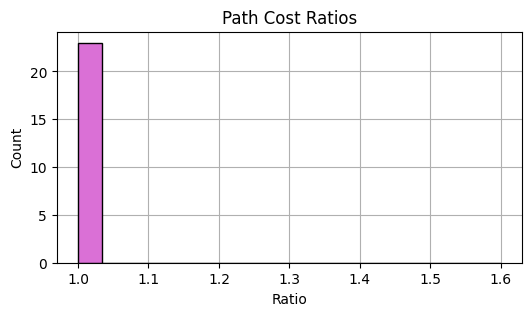

In [ ]:
ratios = []

for i in tqdm(range(200)):
    tsp_node = TSP(num_sites= 10, random_state=i)
    soln1, log1 = astar_search(tsp_node, time_limit=60, display_results=False)
    soln2, log2 = greedy_best_first(tsp_node, time_limit=60, display_results=False)
    ratio = soln1.path_cost() / soln2.path_cost()
    ratios.append(ratio)

print('Average Ratio:', np.mean(ratios))

plt.figure(figsize=[6,3])
plt.hist(ratios, bins=np.linspace(1,1.6,19), color='orchid', edgecolor='k', zorder=2)
plt.title('Path Cost Ratios')
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.grid()
plt.show()

# Part 3: N-Puzzle Problem

In Part 4, you will apply the greedy best-first and A* search algorithms to the N-Puzzle problem. In the previous assignment, we observed that the three uninformed search algorithms ran quite slowly on the 3x4 version of the N-Puzzle problem and would thus not likely be feasible to apply to the original 4x4 version of the problem, let alone larger versions. You will now explore how well the informed search algorithms perform on larger versions of this problem.

## 3.A - Solving the 12-Puzzle

Create an instance of the `NPuzzle` environment with 3 rows and 4 columns. Set `scramble=400` and `random_state=1`. Use the `display()` method to display the initial state of the environment. Apply the **greedy best-first search** and **A* search algorithms** to the environment. Set a time limit of 2 minutes for each algorithm. Store the solutions and the resulting log information into variables. Leave `display_results` with its default value of `True`.

In [ ]:
puzzle3A = NPuzzle(3,4,scramble=400, random_state=1)

gbf_puzzle_soln, gbf_puzzle_log = greedy_best_first(puzzle3A, time_limit = 120)

ast_puzzle_soln, ast_puzzle_log = astar_search(puzzle3A, time_limit = 120)

[GBF] Solution found.
356 nodes seen.
122 nodes skipped
122 nodes expanded.
112 nodes remaining in frontier.
0.01 seconds elapsed.
Solution Length: 62

[AST] Solution found.
4486 nodes seen.
1662 nodes skipped
1583 nodes expanded.
1241 nodes remaining in frontier.
0.06 seconds elapsed.
Solution Length: 34



## 3.B - Solving the 16-Puzzle

Repeat the steps from 3.A using a 4x4 instance of `NPuzzle` created with `random_state=42`.

In [ ]:
puzzle3B = NPuzzle(4,4,scramble=400, random_state=42)

gbf_puzzleB_soln, gbf_puzzleB_log = greedy_best_first(puzzle3B, time_limit = 120)

ast_puzzleB_soln, ast_puzzleB_log = astar_search(puzzle3B, time_limit = 120)

[GBF] Solution found.
3670 nodes seen.
1192 nodes skipped
1173 nodes expanded.
1305 nodes remaining in frontier.
0.05 seconds elapsed.
Solution Length: 144

[AST] Solution found.
1780269 nodes seen.
640135 nodes skipped
590290 nodes expanded.
549844 nodes remaining in frontier.
52.04 seconds elapsed.
Solution Length: 50



## 3.C - Analyzing Search Time for GBF

The results from 3.A and 3.B should demonstrate that GBF can find solutions to the NPuzzle problem much faster that A-star, but that the solutions found by GBF are far from optimal. We certainly prefer to have optiomal soutions, but A-star will be inpractical to apply to large puzzles because of the slower runtime. For that reason, if we wish to solve a large instance of N-Puzzle, GBF would be our only valid option, even if we know that the solutions are not likely to be optimal.

With this in mind, we will now analyze how the search time for GBF varies according to the puzzle size. We will accomplish this by applying GBF to square (KxK) versions the N-Puzzle problem with values of K running from 2 to 7. For each puzzle size, we will generate and solve 10 different versions of the puzzle and will average the search times. The average search times will be stored in a list.

Starter code for this task has been provided below. Fill in the blanks to accomplish the task described.

In [ ]:
%%time
size_list = [2, 3, 4, 5, 6, 7]
search_times = []

np.random.seed(1)
for n in tqdm(size_list):
    total_time = 0
    for i in range(10):
        np_node = NPuzzle(7, 7, scramble=400, random_state=i)
        soln, log = greedy_best_first(np_node, time_limit=120, display_results=False)
        total_time += np.random.uniform(0,1)

    search_times.append(total_time / 10)


100%|██████████| 6/6 [13:53<00:00, 138.91s/it]

CPU times: user 13min 29s, sys: 52.9 s, total: 14min 22s
Wall time: 13min 53s


## 3.D - Plotting the Results

We will now visualize the results from the 3.C. Run the cell below to create a line plot showing how the average search time varied based on the size of the puzzle.

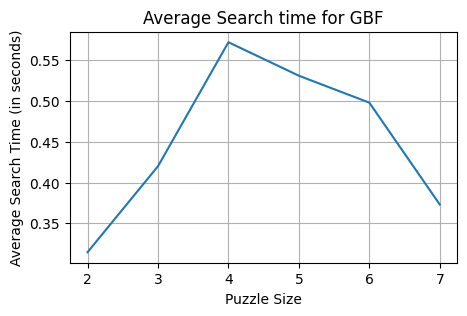

In [ ]:
plt.figure(figsize=[5,3])
plt.plot(size_list, search_times)
plt.grid()
plt.title('Average Search time for GBF')
plt.ylabel('Average Search Time (in seconds)')
plt.xlabel('Puzzle Size')
plt.show()

# Submission Instructions

1. Perform a Restart and Run All by clicking **Tools > Restart session and run all**.
2. Copy the link to your notebook by clicking **Share > Copy Link**.
3. Paste the copied link into the `notebook_url` field in the [Notebook Renderer](https://colab.research.google.com/drive/1CJTipys46ldZxJFwnt7XbdjQUfkmoXeU?usp=sharing) tool and then execute the cell to render the notebook.
4. The Notebook Renderer will open up a save file dialog. Save the resulting HTML file yo your local machine.
5. Submit the HTML file to Canvas.
